<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=300 height=300 align=left class="saturate" >

<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Artificial Intelligence <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Spring 2023<br>
<font color=3C99D size=5>
    Practical Assignment 1 - Search <br>
<font color=696880 size=4>
    Mohammad Mahdi Abootorabi and Roozbeh Pirayadi 

____

# Personal Data

In [1]:
# Set your student number
student_number = '400104715'
Name = 'Ali'
Last_Name = 'Aghayari'

# Rules
- Make sure that all of your cells can be run perfectly. 
- You are not allowed to add or remove cells. You **must use the provided space to write your code**. If you don't follow this rule, **your Practical Assignment won't be graded**. 
- There is one cell for your custom functions (if you need any) at the beginning of each question. Please note that this jupyter file might be broken down into 3 or 4 jupyter notebooks for easier grading, so you **must write your custom functions in the correct cell**.

# Q2: Simulated Annealing (100 Points)

<font size=4>
Author: Mohammad Mahdi Abootorabi
			<br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

## Libraries

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tqdm import tqdm
import math

In [3]:
# place for your custom functions here

## Knapsack Problem

In this problem, we will tackle the knapsack problem with using simulated annealing algorithm. You can find more detail about this problem [here](https://www.geeksforgeeks.org/0-1-knapsack-problem-dp-10/).


To use local search algorithms, we must define our state-space. As the problem is about choosing a object or not, we define each state as a vector $S$ of size $n$ ( $n$ is total number of objects). 

$$
S_i=   \left\{
\begin{array}{ll}
      1 & \text{object $i$ is selected} \\
      0 & \text{object $i$ is not selected}
\end{array} 
\right.
$$

Write a function that generates a random state. i.e., it must return a boolean vector of size n. p is probablity of selecting an object. For example, if p=0.5, then the function must return a vector of size n in which each element is selected with 50% probability.

In [4]:
def random_state_generator(n, p=0.5):
    return [random.random() <= p for i in range(n)]   

## 

## Value Function

Our Proposed Value function is:

$$
f(S) =   \left\{
\begin{array}{ll}
      \sum_{i=1}^{n} s_{i} v_{i} & \text{if  $\sum_{i=1}^{n} s_{i} w_{i} \leq W $ } \\
      0 & \text{Otherwise}
\end{array} 
\right.
$$

Note that: 

n = length of items

$s_i$ = ith item of state S

$v_i$ = ith value 

$w_i$ = ith weight 

$W$ = knapsack weight 



In [5]:
def value_function(W, weights, values, state):
    sum = 0
    for i in range(min(len(values),len(weights),len(state))):
        sum += state[i] * weights[i]
    if (sum > W) : return 0
    res = 0 
    for i in range(min(len(values),len(weights),len(state))):
        res += state[i] * values[i]
    return res

## Acceptance probability function

the acceptance probability function calculates the probability of accepting a worse solution. It is defined as:
$$
P = e^{- \frac{(f(S_{old}) - f(S_{new}))^{1.5}}{T} }
$$

In [6]:
def prob_accept(state_value, next_state_value, temperature):    
    return math.pow(math.e , - (math.pow((state_value - next_state_value) , 1.5) / temperature))

## Neighbor state generator

The neighbor state generator generates a neighbor state of the current state. Our neighbor state generator is defined as:

1- Select a random index $i$ from $[1, n]$.

2- Flip the value of $S_i$.

3- With probablity of 'prob' flip the value of another random index $j$ from $[1, n]$.

4- If this state is feasible(the sum of weights of selected objects is less than or equal to the knapsack weight), return this state. Otherwise, Continue from step 1.


In [7]:
def neighbor_state_generator(state, W, weights, values, prob=0.5):
    state = state.copy()
    while(True):
        i = random.randrange(0, len(state))
        state[i] ^=1
        if (random.random() <= prob) : 
            j = random.randrange(0, len(state))
            state[j] ^= 1
        if value_function(W ,weights ,values ,state) != 0 : return state

## Main function

Now Implement the main 'anneal' function that performs the algorithm. Try to experiment with different initial T and $alpha$ values to get the best result. Also, your function must implement these two stop criteria:

- If the number of iterations exceeded 'stopping_iter', stop.
- If the temperature drops below 'stopping_temprature', stop.

In [8]:
def simulated_annealing(W, weights, values, stopping_temperature=1e-8, stopping_iter=2000, alpha=0.999, T=80, neighbour_prob=0.5, initial_state_true_prob=0.5):
    best_solution = None
    best_value = float("-inf")
    records = []
    current_solution = random_state_generator(min(len(values) ,len(weights)) ,initial_state_true_prob)
    current_value = value_function(W, weights, values, current_solution)
    for i in range(stopping_iter):
        if (T <= stopping_temperature) : break
        neighbor = neighbor_state_generator(current_solution, W, weights, values, neighbour_prob)
        neighbor_value = value_function(W, weights, values, neighbor)
        if current_value < neighbor_value:
            current_solution = neighbor
            current_value = neighbor_value
        else :
            if random.random() < prob_accept(current_value, neighbor_value,T): 
                current_solution = neighbor
                current_value = neighbor_value
        if (current_value > best_value):
            best_value = current_value
            best_solution = current_solution
        records.append(current_value)
        records.append(current_solution)
        T *= alpha
    return best_value, best_solution, records

Now lets run it one a sample problem. You can change the parameters of the function to get better results.

In [9]:
weights = [random.randint(0, 50) for _ in range(100)]
values = [random.randint(0, 70) for _ in range(100)]
W = 1000
best_value , best_sol, records = simulated_annealing(W, weights, values, alpha=0.99, neighbour_prob=0.2, initial_state_true_prob=0.2)
print(f'best value: {best_value}')
print(f'weight used: {np.dot(best_sol, weights)}')

best value: 2556
weight used: 998


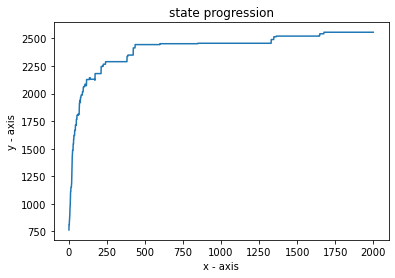

In [10]:
x_val = [i for i in range(1, len(records)//2 + 1 )]
y_val = [records[i] for i in range(0,len(records),2)]
plt.plot(x_val ,y_val)
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('state progression')
plt.show()

For better evaluation now just test your algorithm on more examples and see the average value of the best solutions.

In [11]:
def test_algorithm(number_of_tests):
    sum_best_values = 0
    for i in range(number_of_tests):
        weights = [random.randint(1, 50) for _ in range(100)]
        values = [random.randint(0, 75) for _ in range(100)]
        W = 1000
        best_value, best_solution, _ = simulated_annealing(W, weights, values, alpha=0.99, neighbour_prob=0.2, initial_state_true_prob=0.2)
        print(f'best value sample {i + 1}: {best_value}')
        print(f'weight used sample {i + 1}: {np.dot(best_solution, weights)}')
        sum_best_values += best_value
    return sum_best_values / number_of_tests


In [12]:
print(f"Average of best values that algorithm reached is {test_algorithm(20)}")

best value sample 1: 2548
weight used sample 1: 1000
best value sample 2: 2464
weight used sample 2: 994
best value sample 3: 2527
weight used sample 3: 1000
best value sample 4: 2596
weight used sample 4: 999
best value sample 5: 2938
weight used sample 5: 999
best value sample 6: 2498
weight used sample 6: 995
best value sample 7: 2371
weight used sample 7: 995
best value sample 8: 2482
weight used sample 8: 994
best value sample 9: 2724
weight used sample 9: 1000
best value sample 10: 2467
weight used sample 10: 1000
best value sample 11: 2228
weight used sample 11: 995
best value sample 12: 2563
weight used sample 12: 999
best value sample 13: 2800
weight used sample 13: 999
best value sample 14: 2645
weight used sample 14: 1000
best value sample 15: 2337
weight used sample 15: 999
best value sample 16: 2675
weight used sample 16: 995
best value sample 17: 2917
weight used sample 17: 998
best value sample 18: 2511
weight used sample 18: 997
best value sample 19: 2322
weight used sa